In [27]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

+ Download dữ liệu CIFAR10 sau đó chia thành 2 tập dữ liệu train và validation.
+ Chuẩn hóa dữ liệu với mean = 0.5 và std = 0.5

In [28]:
# 1. Download CIFAR10 và chia dữ liệu
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
train_size = int(0.8 * len(trainset))
val_size = len(trainset) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(trainset, [train_size, val_size])

trainloader = torch.utils.data.DataLoader(train_dataset, batch_size=64,
                                          shuffle=True, num_workers=2)
valloader = torch.utils.data.DataLoader(val_dataset, batch_size=64,
                                        shuffle=False, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100.0%


+ Hiển thị 5 ảnh đầu tiên trong tập dữ liệu testing

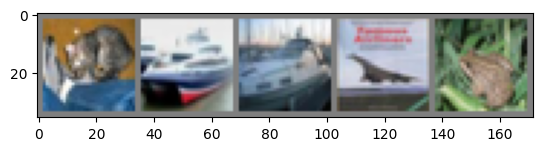

Labels:   cat  ship  ship plane  frog


In [29]:
# 2. Hiển thị 5 ảnh đầu tiên trong test dataset
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(testloader)
images, labels = next(dataiter)

imshow(torchvision.utils.make_grid(images[:5]))
print('Labels:', ' '.join('%5s' % classes[labels[j]] for j in range(5)))

+ Xây dựng model MLP cơ bản để train tập dữ liệu CIFAR10

In [30]:
# 3. Xây dựng model MLP cơ bản
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(3*32*32, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = x.view(-1, 3*32*32)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = MLP().to(device)

+ Khởi tạo hàm loss function và phương thức optimizer

In [31]:
# 4. Loss function và Optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

+ Xây dựng hàm đánh giá model

In [32]:
# 5. Hàm đánh giá model
def evaluate(model, dataloader):
    model.eval()
    correct, total = 0, 0
    with torch.no_grad():
        for data in dataloader:
            images, labels = data[0].to(device), data[1].to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    return 100 * correct / total

+ Bắt đầu training và đánh giá model.

In [33]:
# 6. Training
num_epochs = 5
for epoch in range(num_epochs):
    net.train()
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data[0].to(device), data[1].to(device)

        optimizer.zero_grad()
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 100 == 99:    # in sau mỗi 100 mini-batches
            print(f"[Epoch {epoch+1}, Batch {i+1}] loss: {running_loss/100:.3f}")
            running_loss = 0.0

    val_acc = evaluate(net, valloader)
    print(f"Epoch {epoch+1} Validation Accuracy: {val_acc:.2f}%")

print('Finished Training')

[Epoch 1, Batch 100] loss: 1.890
[Epoch 1, Batch 200] loss: 1.724
[Epoch 1, Batch 300] loss: 1.638
[Epoch 1, Batch 400] loss: 1.604
[Epoch 1, Batch 500] loss: 1.592
[Epoch 1, Batch 600] loss: 1.571
Epoch 1 Validation Accuracy: 46.71%
[Epoch 2, Batch 100] loss: 1.471
[Epoch 2, Batch 200] loss: 1.467
[Epoch 2, Batch 300] loss: 1.443
[Epoch 2, Batch 400] loss: 1.450
[Epoch 2, Batch 500] loss: 1.456
[Epoch 2, Batch 600] loss: 1.442
Epoch 2 Validation Accuracy: 48.77%
[Epoch 3, Batch 100] loss: 1.295
[Epoch 3, Batch 200] loss: 1.357
[Epoch 3, Batch 300] loss: 1.338
[Epoch 3, Batch 400] loss: 1.363
[Epoch 3, Batch 500] loss: 1.357
[Epoch 3, Batch 600] loss: 1.333
Epoch 3 Validation Accuracy: 48.63%
[Epoch 4, Batch 100] loss: 1.225
[Epoch 4, Batch 200] loss: 1.260
[Epoch 4, Batch 300] loss: 1.240
[Epoch 4, Batch 400] loss: 1.264
[Epoch 4, Batch 500] loss: 1.262
[Epoch 4, Batch 600] loss: 1.249
Epoch 4 Validation Accuracy: 50.55%
[Epoch 5, Batch 100] loss: 1.084
[Epoch 5, Batch 200] loss: 1.15

In [34]:
# 7. Đánh giá trên test set
test_acc = evaluate(net, testloader)
print(f"Test Accuracy: {test_acc:.2f}%")

Test Accuracy: 51.68%


+ Dưới đây là bài tập về code from scratch

In [35]:
def zScoreScaling(tensor):
    mean = tensor.mean(dim=0, keepdim=True)
    std = tensor.std(dim=0, keepdim=True)
    return (tensor - mean) / std

In [36]:
def minMaxScaling(tensor):
    min_val = tensor.min(dim=0, keepdim=True).values
    max_val = tensor.max(dim=0, keepdim=True).values
    return (tensor - min_val) / (max_val - min_val)

In [37]:
class Linear:
     def __init__(self, in_features, out_features):
        self.weight = torch.randn(out_features, in_features)
        self.bias = torch.randn(out_features)
    

In [38]:
tensor = torch.tensor([
    [1.0, 2.0, 3.0], 
    [4.0, 5.0, 6.0],
    [7.0, 8.0, 9.0]
])
zscore = zScoreScaling(tensor)
min_max = minMaxScaling(tensor)
print(zscore)
print(min_max)


tensor([[-1., -1., -1.],
        [ 0.,  0.,  0.],
        [ 1.,  1.,  1.]])
tensor([[0.0000, 0.0000, 0.0000],
        [0.5000, 0.5000, 0.5000],
        [1.0000, 1.0000, 1.0000]])


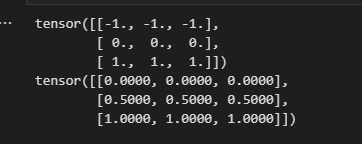

In [41]:
class Linear:
    def __init__(self, in_features, out_features):
        # Khởi tạo weight và bias ngẫu nhiên
        self.weight = torch.randn(out_features, in_features, requires_grad=True)
        self.bias = torch.randn(out_features, requires_grad=True)

    def forward(self, x):
        # Thực hiện phép tính tuyến tính y = xW^T + b
        return x @ self.weight.t() + self.bias

In [42]:
# Test code của bạn
tensor = torch.tensor([1.0, 2.0, 3.0])  # input size = 3
linear = Linear(3, 2)                   # Linear: 3 -> 2
out = linear.forward(tensor)

print("Output:", out)
print(f"Weight = {linear.weight}")
print(f"Bias = {linear.bias}")

Output: tensor([-0.9415, -5.7618], grad_fn=<AddBackward0>)
Weight = tensor([[-0.2444, -0.9343,  0.6663],
        [-0.1686, -0.4537, -1.1106]], requires_grad=True)
Bias = tensor([-0.8275, -1.3539], requires_grad=True)
